# Lösungen

## Konfiguration und Python-Pakete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# falls nicht vorhanden: conda install networkx pydot
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Aufgabe 1: Anwendungsbeispiele

Nenen Sie mindestens fünf Anwendungsbeispiele von Graphen, die in der Vorlesung noch nicht genannt sind.

### Lösung

- Inhaltsverzeichnis eines Buches -> Baum
- elektrische Schaltungen
- [Einfärben von Landkarten](https://de.wikipedia.org/wiki/Vier-Farben-Satz)
- Kanalisation
- [Zuordnung von z. B. Aufgaben zu Arbeitern](https://de.wikipedia.org/wiki/Zuordnungsproblem)
- das Gehirn
- Zitatenetzwerk

Für mehr Beispiele siehe z. B. [Wikipedia: Graph theory > Applications](https://en.wikipedia.org/wiki/Graph_theory#Applications).

## Aufgabe 2: Adjazenzmatrix

1. Konstruieren und zeichnen Sie mit NetworkX einen Graphen $G$ mit 5 Knoten und 5 Kanten, die einen Kreis bilden. 
2. Mit dem Befehl `nx.adjacency_matrix(G).toarray()` erhalten Sie die Adjazenzmatrix von $G$. Was beschreibt Sie? 
3. Wie sieht ein Graph aus, dessen Adjazenzmatrix Nullen auf der Diagonalen hat und ansonsten Einträge 1 hat? Zeichnen Sie ein Beispiel auf.

### Lösung

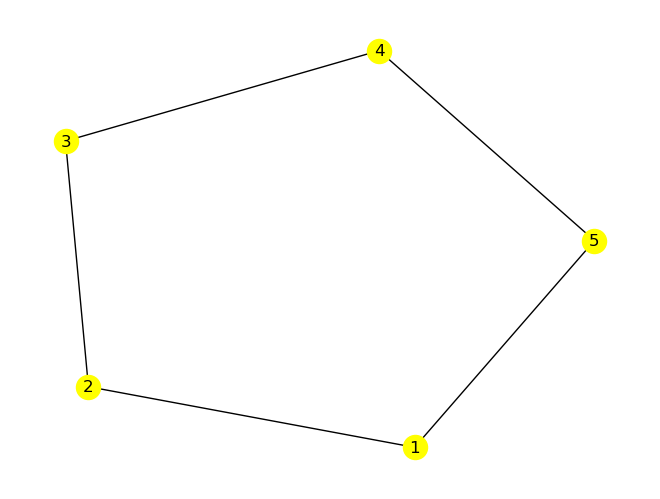

In [2]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')

In [3]:
nx.adjacency_matrix(G).toarray()

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

Siehe z. B. [Wikipedia: Adjazenzmatrix](https://de.wikipedia.org/wiki/Adjazenzmatrix).

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

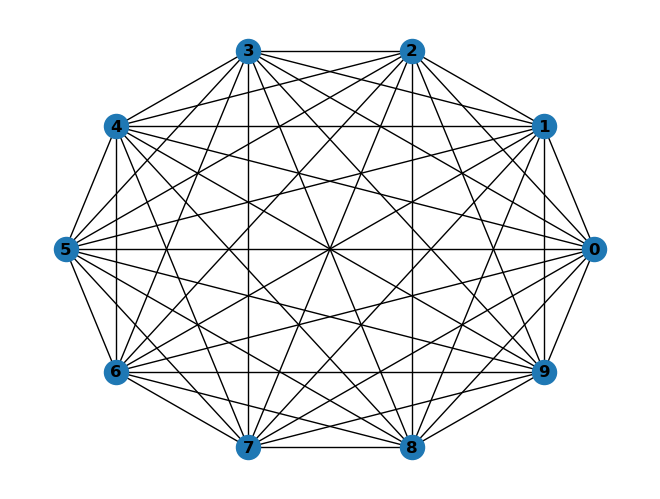

In [4]:
G = nx.complete_graph(10)
nx.draw_circular(G, with_labels=True, font_weight='bold')
nx.adjacency_matrix(G).toarray()

## Aufgabe 3: Breitensuche

Implementieren Sie die Breitensuche mit einer Funktion, die den resultierenden Spannbaum als gerichteten Graphen zurückgibt. Vergleichen Sie Ihre Implementierung mit jener von NetworkX anhand mehrerer zufälliger, ungerichteter Graphen, die Sie z. B. mit dem Befehl `gnm_random_graph` erzeugen können.

### Lösung

In [5]:
G = nx.gnm_random_graph(n=10, m=15)

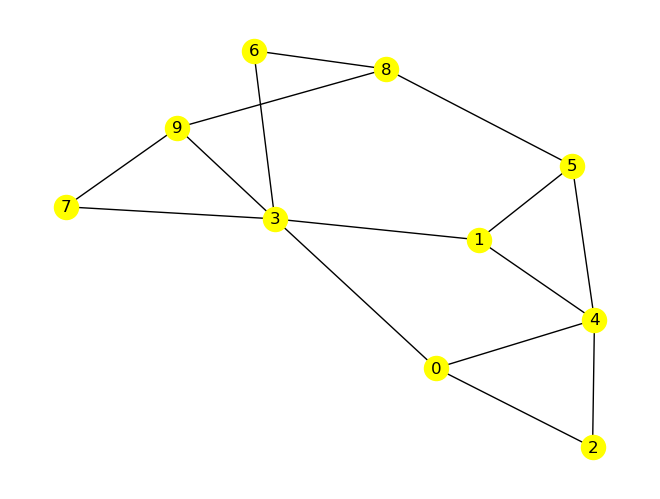

In [6]:
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')

In [7]:
def my_plot(T, edges, node_start, pos):
    nodes = [node_start] + [v for u, v in edges]
    label = {}
    counter = 0
    for node in nodes:
        label[node] = counter
        counter += 1

    nx.draw(T, pos, node_color='yellow')
    nx.draw_networkx_labels(T, pos, label);

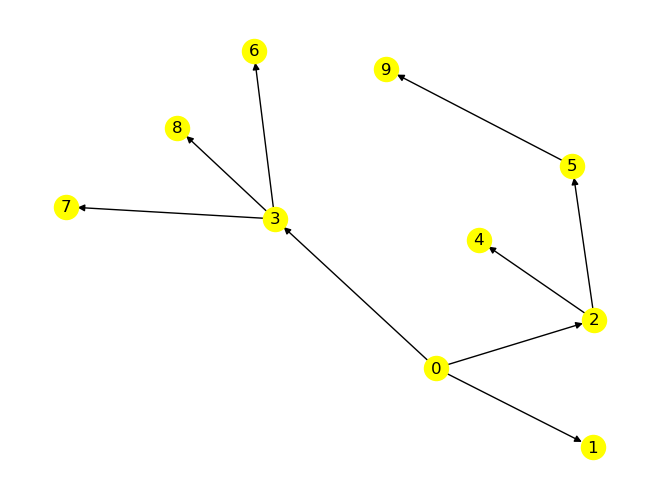

In [8]:
node_start = 0

T = nx.bfs_tree(G, node_start)
edges = nx.bfs_edges(G, node_start)  # edges in bfs order

my_plot(T, edges, node_start, pos)

In [9]:
def my_add(node, nodes_visited, edges_traversed):
    todo_new = []
    for neighbor_node in G.neighbors(node):
        if neighbor_node not in nodes_visited:
            nodes_visited.append(neighbor_node)
            edges_traversed.append((node, neighbor_node))
            todo_new.append(neighbor_node)
    return todo_new, nodes_visited, edges_traversed

def my_bfs(G, node_start):
    nodes_visited   = [node_start]  # already visited
    edges_traversed = []            # already traversed
    todo = [node_start]             # check neighbors of todo nodes 
    while len(todo):
        doing = todo
        todo = []
        for node in doing:
            print(f"current {node = }")
            todo_new, nodes_visited, edges_traversed = my_add(node, nodes_visited, edges_traversed)
            todo += todo_new
            print(f"  {todo_new = }")
            print(f"  {nodes_visited = }")
    my_T = nx.DiGraph()
    my_T.add_edges_from(edges_traversed)
    return my_T, edges_traversed

current node = 0
  todo_new = [2, 4, 3]
  nodes_visited = [0, 2, 4, 3]
current node = 2
  todo_new = []
  nodes_visited = [0, 2, 4, 3]
current node = 4
  todo_new = [1, 5]
  nodes_visited = [0, 2, 4, 3, 1, 5]
current node = 3
  todo_new = [6, 7, 9]
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9]
current node = 1
  todo_new = []
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9]
current node = 5
  todo_new = [8]
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9, 8]
current node = 6
  todo_new = []
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9, 8]
current node = 7
  todo_new = []
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9, 8]
current node = 9
  todo_new = []
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9, 8]
current node = 8
  todo_new = []
  nodes_visited = [0, 2, 4, 3, 1, 5, 6, 7, 9, 8]


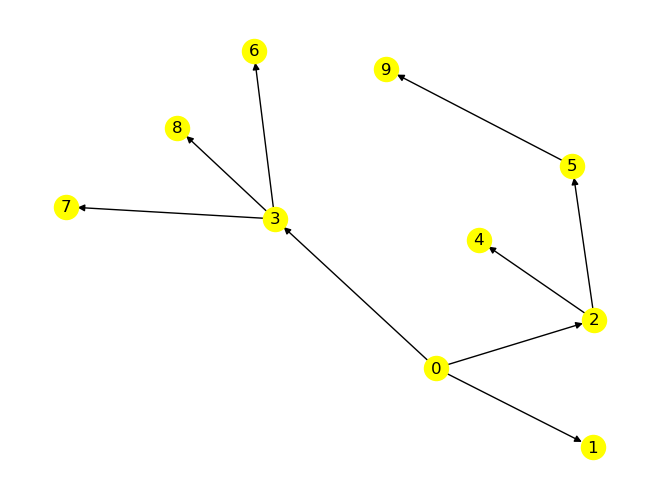

In [10]:
my_T, my_edges = my_bfs(G, node_start)

my_plot(my_T, my_edges, node_start, pos)

## Aufgabe 4: Tiefensuche

Implementieren Sie die Tiefensuche mit einer Funktion, die den resultierenden Spannbaum als gerichteten Graphen zurückgibt. Vergleichen Sie Ihre Implementierung mit jener von NetworkX anhand mehrerer zufälliger, ungerichteter Graphen, die Sie z. B. mit dem Befehl `gnm_random_graph` erzeugen können.

*Hinweis:* Mit `G.nodes[node][attribute] = value` können Sie dem Knoten `node` des Graphen `G` ein Attribute `attribute` mit Wert `value` zuweisen.

### Lösung

In [11]:
G = nx.gnm_random_graph(n=10, m=15)

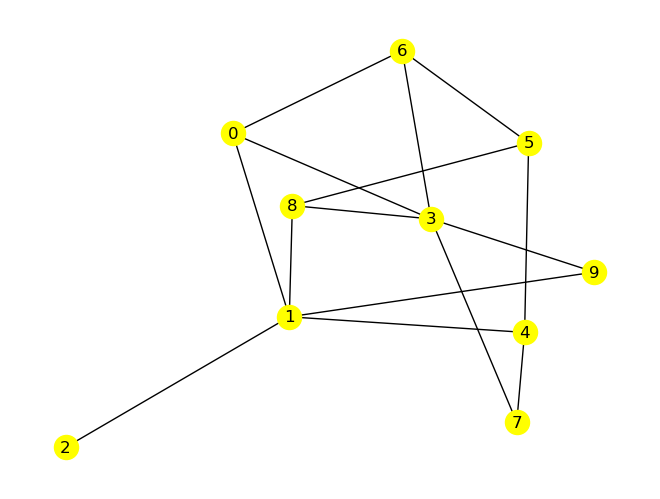

In [12]:
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')

In [13]:
def my_plot(T, edges, node_start, pos):
    nodes = [node_start] + [v for u, v in edges]
    label = {}
    counter = 0
    for node in nodes:
        label[node] = counter
        counter += 1

    nx.draw(T, pos, node_color='yellow')
    nx.draw_networkx_labels(T, pos, label);

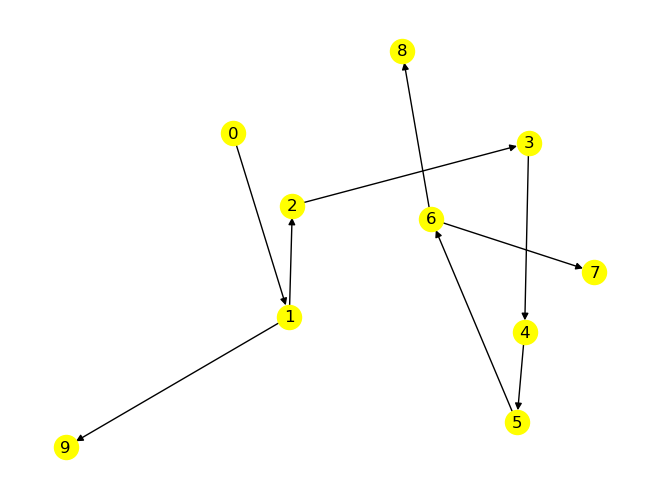

In [14]:
node_start = 0

T = nx.dfs_tree(G, node_start)
edges = nx.dfs_edges(G, node_start)  # edges in dfs order

my_plot(T, edges, node_start, pos)

In [15]:
for node in G.nodes:
    G.nodes[node]['visited'] = False

# G.nodes.data()

In [16]:
def my_traverse_from(node):
    G.nodes[node]['visited'] = True
    for neighbor_node in G.neighbors(node):
        if not G.nodes[neighbor_node]['visited']:
            edges_traversed.append((node, neighbor_node))
            my_traverse_from(neighbor_node)

In [17]:
edges_traversed = []
my_traverse_from(node_start)
my_T = nx.DiGraph()
my_T.add_edges_from(edges_traversed)

# G.nodes.data()

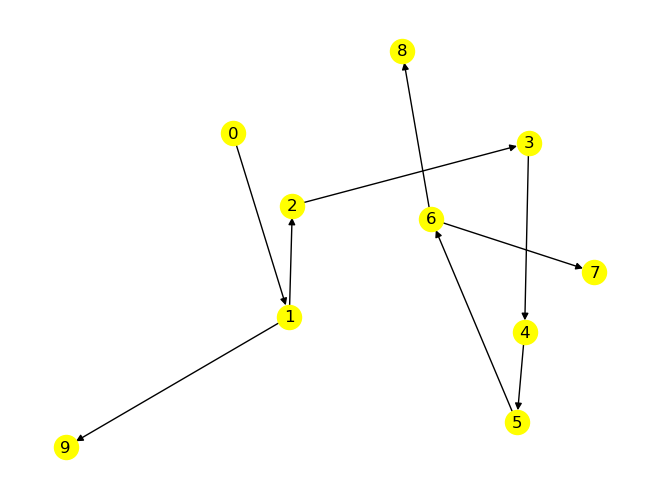

In [18]:
my_plot(my_T, edges_traversed, node_start, pos)

## Aufgabe 5: Dijkstra-Algorithmus

Durch den Code unten ist ein ungerichteter Graph $G$ definiert.

1. Führen Sie von Hand den Dijkstra-Algorithmus aus, indem Sie die Tabelle unten analog zur Vorlesung füllen.

    | S     | B   | C   | D   | E   | F   | G   | H   |
    | ----- | --- | --- | --- | --- | --- | --- | --- |
    | **0** | ue. | ue. | ue. | ue. | ue. | ue. | ue. |
    |       |     |     |     |     |     |     |     |
    |       |     |     |     |     |     |     |     |
    |       |     |     |     |     |     |     |     |

    Dabei steht ue. für unendlich.

2. Überprüfen Sie Ihr Ergebnis am Computer mit entsprechenden NetworkX-Funktionen.

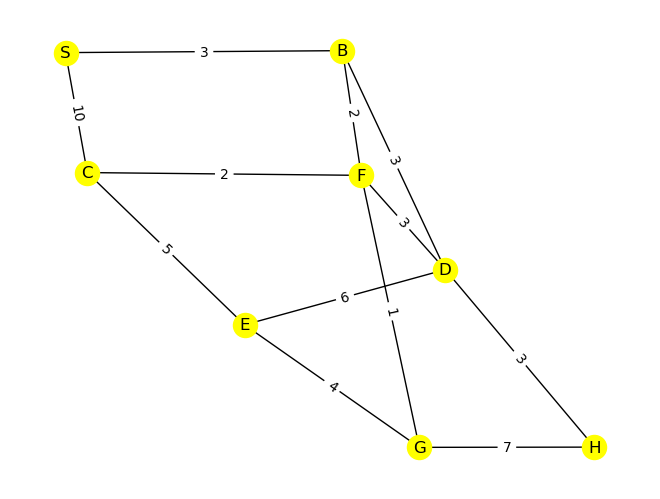

In [19]:
G = nx.Graph()

G.add_edge('S', 'B', weight= 3)
G.add_edge('S', 'C', weight= 10)
G.add_edge('B', 'D', weight= 3)
G.add_edge('D', 'E', weight= 6)
G.add_edge('D', 'F', weight= 3)
G.add_edge('E', 'C', weight= 5)
G.add_edge('B', 'F', weight= 2)
G.add_edge('C', 'F', weight= 2)
G.add_edge('E', 'G', weight= 4)
G.add_edge('G', 'H', weight= 7)
G.add_edge('F', 'G', weight= 1)
G.add_edge('D', 'H', weight= 3)

pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels);

### Lösung

| S     | B         | C         | D         | E          | F         | G         | H         |
| ----- | --------- | --------- | --------- | ---------- | --------- | --------- | --------- |
| **0** | ue.       | ue.       | ue.       | ue.        | ue.       | ue.       | ue.       |
| -     | **3$_S$** | 10$_S$    | ue.       | ue.        | ue.       | ue.       | ue.       |
| -     | -         | 10$_S$    | 6$_B$     | ue.        | **5$_B$** | ue.       | ue.       |
| -     | -         | 7$_F$     | **6$_B$** | ue.        | -         | 6$_F$     | ue.       |
| -     | -         | 7$_F$     | -         | 12$_D$     | -         | **6$_F$** | 9$_D$     |
| -     | -         | **7$_F$** | -         | 10$_G$     | -         | -         | 9$_D$     |
| -     | -         | -         | -         | 10$_G$     | -         | -         | **9$_D$** |
| -     | -         | -         | -         | **10$_G$** | -         | -         | -         |

In [20]:
nx.shortest_path(G, source='S', target=None, weight='weight')

{'S': ['S'],
 'B': ['S', 'B'],
 'C': ['S', 'B', 'F', 'C'],
 'D': ['S', 'B', 'D'],
 'F': ['S', 'B', 'F'],
 'G': ['S', 'B', 'F', 'G'],
 'E': ['S', 'B', 'F', 'G', 'E'],
 'H': ['S', 'B', 'D', 'H']}

In [21]:
nx.shortest_path_length(G, source='S', target=None, weight='weight')

{'S': 0, 'B': 3, 'F': 5, 'D': 6, 'G': 6, 'C': 7, 'H': 9, 'E': 10}